In [1]:
from LocalDatabase import get_schedule_connection
conn = get_schedule_connection()
with conn.cursor() as cur:
    sql = "select teacher_id, begin_at from teacher_appointments ta join schedules s on s.id = ta.schedule_id and s.begin_at = %r \
    where ta.tag in (2,3) and status in (4,2) limit 100" % '2018-07-30 18:40:00'
    sql = "select begin_at, sum(case when status = 3 then 1 else 0 end),sum(case when status in (2,4) and tag in (2,3) \
    then 1 else 0 end) from teacher_appointments ta join schedules s on s.id = ta.schedule_id and s.begin_at > %r \
    and s.begin_at < %r and is_internal = 0 and date_format(begin_at, '%%H:%%i') in ('08:40', '09:20', '10:00', \
    '10:40', '11:20', '18:40', '19:20', '20:00', '20:40') where status in (4, 3, 2) group by begin_at" % ('2018-08-15 18:40:00','2018-09-15 12:40:00') 
    cur.execute(sql)
    row = cur.fetchall()

In [2]:
import matplotlib.pyplot as plt
import numpy as np

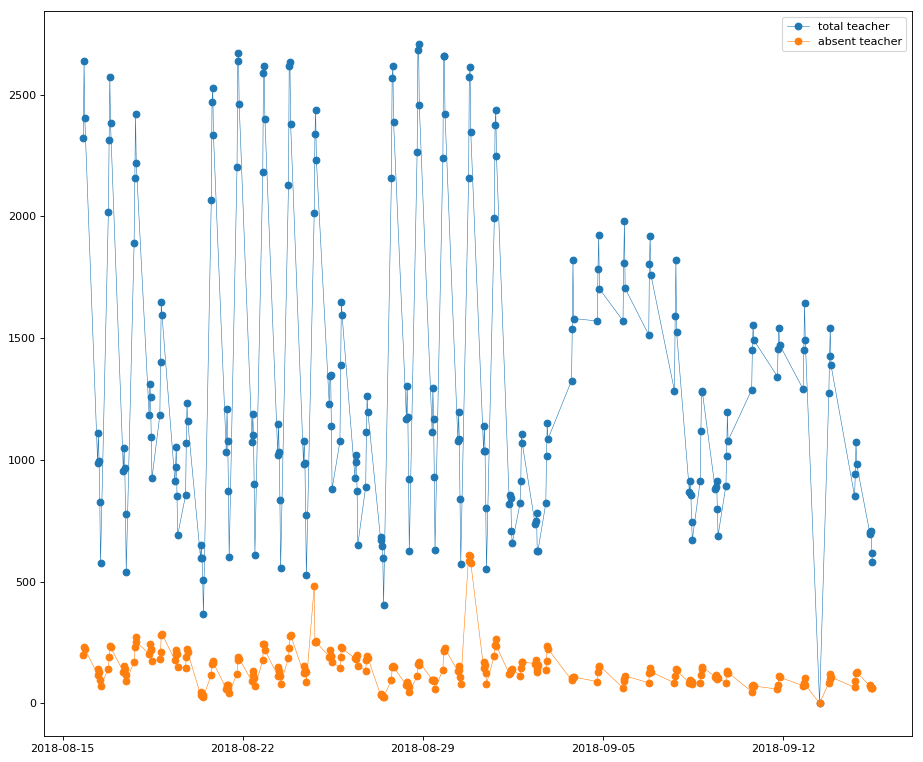

In [3]:
data = np.array(row)
plt.figure(figsize=(14,12),dpi=80)
plt.plot(data[:,0],data[:,1],marker='o',label="total teacher",linewidth = 0.5)
plt.plot(data[:,0],data[:,2],marker='o',label="absent teacher",linewidth = 0.5)
plt.legend()
plt.show()

In [4]:
rate =  data[:,2] / data[:,1]
rate

array([Decimal('0.08573890564411891426109435588'),
       Decimal('0.08753315649867374005305039788'),
       Decimal('0.09321681231793591344153141906'),
       Decimal('0.1195542046605876393110435664'),
       Decimal('0.1278127812781278127812781278'),
       Decimal('0.1283851554663991975927783350'),
       Decimal('0.1136638452237001209189842805'),
       Decimal('0.1215277777777777777777777778'),
       Decimal('0.06994047619047619047619047619'),
       Decimal('0.08293736501079913606911447084'),
       Decimal('0.09168609168609168609168609169'),
       Decimal('0.09651699538396978598405371381'),
       Decimal('0.1365546218487394957983193277'),
       Decimal('0.1458531935176358436606291706'),
       Decimal('0.1471502590673575129533678756'),
       Decimal('0.1516709511568123393316195373'),
       Decimal('0.1663585951940850277264325323'),
       Decimal('0.08985200845665961945031712474'),
       Decimal('0.1075567918405192396847473343'),
       Decimal('0.112489660876757650951199

In [8]:
np.argmax(rate)

134

In [12]:
data[134]

array([datetime.datetime(2018, 8, 30, 18, 40), Decimal('2156'),
       Decimal('608')], dtype=object)